In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab 
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import scipy.stats as ss


group1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
group2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])

In [ ]:
def SKO(ar):
    summary = 0
    avg = np.mean(ar)
    for i in ar:
        summary += ((avg - i) ** 2)
    return (summary / (len(ar)-1)) ** 0.5

Межквартильный размах - разница между первым и третьим квартилем, т.е. между 25-м и 75-м процентилями. В него входят
центральные 50% наблюдений в упорядоченном наборе, где 25% наблюдений находятся выше центральной точки, а 25% ниже.

'\nЛиния посередине - медиана (2 квартиль), также отложены 3 квартиль вверх,\nи 1 квартиль вниз, от них отложены линии по 1.5 межквартильных размаха вверх и вниз.\nТочки - это уже выбросы.\n'

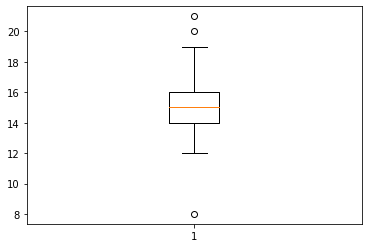

In [3]:
plt.boxplot(group1)
"""
Линия посередине - медиана (2 квартиль), также отложены 3 квартиль вверх,
и 1 квартиль вниз, от них отложены линии по 1.5 межквартильных размаха вверх и вниз.
Точки - это уже выбросы.
"""
# В каждый квартиль входят по 25 процентов наблюдений

In [4]:
def plot_dencity(data):
    sns.set(rc={'figure.figsize':(8, 8)})
    sns.kdeplot(data)

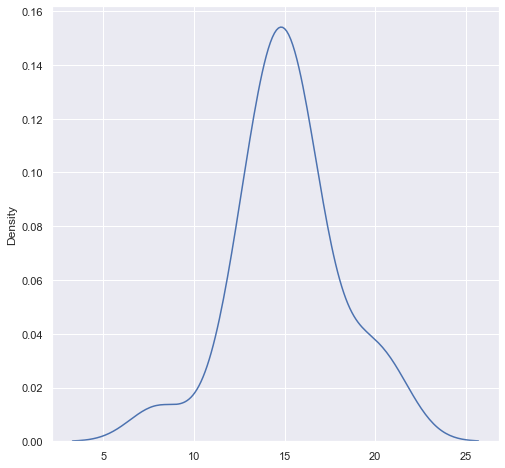

In [5]:
plot_dencity(group1)


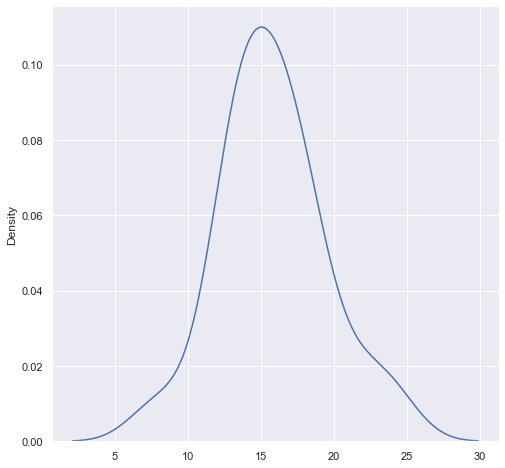

In [6]:
plot_dencity(group2)

In [7]:
def standartise(data):
    return (data - np.mean(data)) / SKO(data)

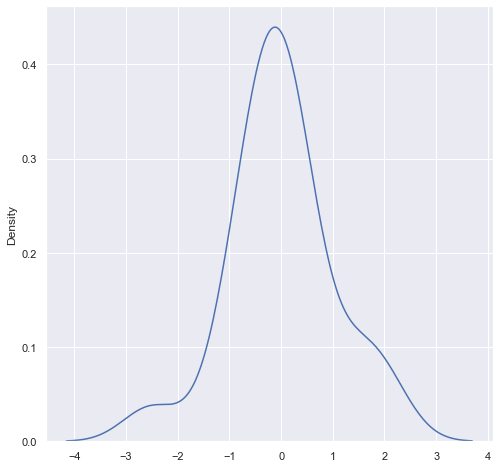

In [8]:
plot_dencity(standartise(group1))

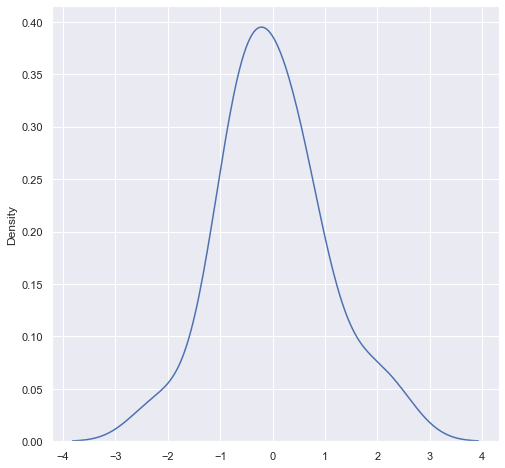

In [9]:
plot_dencity(standartise(group2))

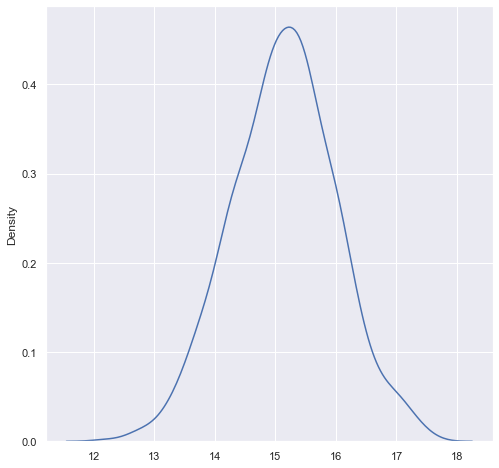

In [10]:
def generate_averages(data, n, to_chose):
    averages = np.array([])
    for i in range(n):
        tem = np.random.choice(data, size=to_chose)
        averages = np.append(averages, np.mean(tem))
    return averages
averages = generate_averages(group1, 1000, 10)
plot_dencity(averages)

In [11]:
def SE(data):
    return SKO(data)/(len(data) ** 0.5)
SE(group1)



"""
Доверительный интервал покажет нам, что с вероятностью n процентов,
среднее генеральной совокупности входит в наш доверительный интервал,
так как согласно ЦПТ (центральной предельной теореме) выборочные средние
распределятся нормально вокруг среднего генеральной совокупности.
"""
def trust_interval_95(data):
    dev = 1.96
    return [np.mean(data) - dev * SE(data), np.mean(data) + dev * SE(data)]
def trust_interval_99(data):
    dev = 2.58
    return [np.mean(data) - dev * SE(data), np.mean(data) + dev * SE(data)]
trust_interval_95(group1)
trust_interval_99(group1)

[13.504634403128467, 16.795365596871534]

In [12]:
"""
Известно, что при некотором заболевании на выздоровление в среднем требуется 20 дней,
У нас выбраны 64 пациента, на которых был опробован новый метод лечения.
Теперь срок выздоровления сократился до 18.5 дней. Стандартное отклонение выборки
пациентов равно 4. Оказал ли препарат какое либо влияние.
"""
n = 64
mu = 18.5
sko = 4

M_cured = 20
"""
Н0: Предположим, что среднее в генеральной совокупности людей, опробовавших
новый препарат = 20
Н1: Альтернативной гипотезой будет уверждение, что среднее в генеральной совокупности людей, опробовавших
новый препарат != 20
"""

"""
При условии, что верна нулевая гипотеза, выборочные средние распределятся нормально
вокруг среднего генеральной совокупности (20) и со стандартной ошибкой se.
Если неизвестно СКО генеральной совокупности, то мы имеем дело с Т распределением,
но здесь пока посчитаем для нормального (z) распределения.
"""
se = sko / (n ** 0.5)
"""
Теперь определим насколько отклонилось наше выборочное среднее от среднего 
генеральной совокупности, для этого сделаем Z-преобразование.
"""
z = (mu - M_cured) / se # Получаем, что наше выборочное среднее отклонилось
# от среднего генеральной совокупности на z сигм, теперь, зная se, мы
# можем расчитать вероятность получить такое или еще более значимое отклонение,
# это будет P-уровень значимости. Если p < 0.05 можно отклонить нулевую гипотезу 
# если по ошибке отклонили нулевую гипотезу - это ошибка первого рода.


# найдем p_value
p_value = scipy.stats.norm.sf(abs(z))


# Получаем, что вероятность получить среднее равное 18.5 равна p.
print(p_value)


0.0013498980316300933


In [13]:
"""
Если число наблюдений выборки меньше 30 и СКО генеральной совокупности неизвестно,
используется распределение Стьюдента (Т-распределение). Распределение Стьюдента
имеет более высокие хвосты, соответственно среди выборочных средних будут чаще 
встречаться сильные отклонения.
С увеличением числа степеней свободы, распределение стремится в нормальному.
Формула расчета Т-распределения остается такой же как у Z-распределения, но тут 
учитывается число степеней свободы.
"""

"""
Для данного теста важна гомогенность дисперсий, а если значений в выборках меньше
30, то выборки должны иметь нормальное распределение.
"""
N = 15 # число наблюдений в выборке
T = -2 # Т-критерий

  
# Determining the p-value
p_value = ss.t.sf(abs(T), df=N-1) * 2 # двусторонний p-уровень значимости
print(p_value)

0.06528795288911197


In [14]:
"""
Сравнение двух средних выборок.
У нас есть x1(среднее первой выборки), sd1(стандартное отклонение первой выборки),
n1(число наблюдений первой выборки). И х2, sd2, n2.
mu1 и mu2 средние генеральных совокупностей
"""

"""
Н0: mu1 = mu2 (средние генеральных совокупностей равны)
Н1: mu1 != mu2 (среднеие генеральных совокупностей отличаются)
"""

"""
Если верна нулевая гипотеза, то выборочные средние х1 - х2 распределятся равномерно
вокруг 0, в данном случае se = (sd1 ** 2 / n1 + sd2 ** 2 / n2) ** 0.5 (каждое СКО
вносит свой вклад в стандартную ошибку, а число
df = n1 + n2 - 2

В данном случае T = ((x1 - x2) - (mu1 - mu2)) / se,
но согласно Н0 mu1 - mu2 = 0
"""

"""
Есть 2 выборки:
"""
# Первая:
x1 = 89.9
sd1 = 11.3
n1 = 20
# Вторая:
x2 = 80.7
sd2 = 11.7
n2 = 20
"""
Можно ли считать значимым утверждение о том, что они принадлежат одной генеральной
совокупности.
H0: mu1 = mu2
H1: mu1 != mu2
"""
se = (sd1 ** 2 / n1 + sd2 ** 2 / n2) ** 0.5
T = (x1 - x2) / se   # тк мы предположили, что выборки из одной совокупности, нет смысл вычитать ноль из числителя
df = n1 + n2 - 2
p_value = ss.t.sf(abs(T), df=df) * 2 # двусторонний p-уровень значимости
if p_value < 0.05:
    print("cancel Н0")
else:
    print("accept H0")
print(f"se={se}; T={T}; p_value={p_value}")




cancel Н0
se=3.6371692289471493; T=2.529439633102561; p_value=0.0156935300771004


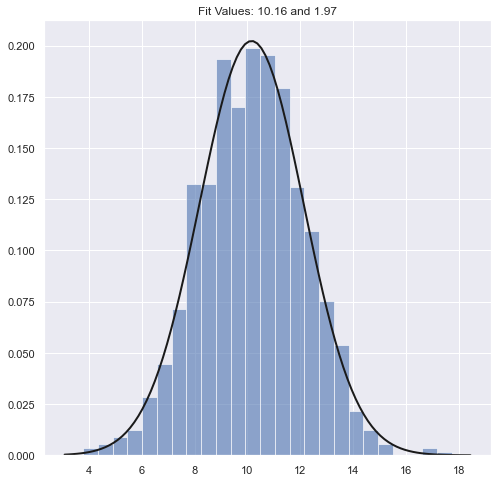

In [15]:
"""
Проверка на нормальность.
"""



data = np.random.normal(loc = 10, scale = 2, size = 1000)
# loc mean - value, scale - standart deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()


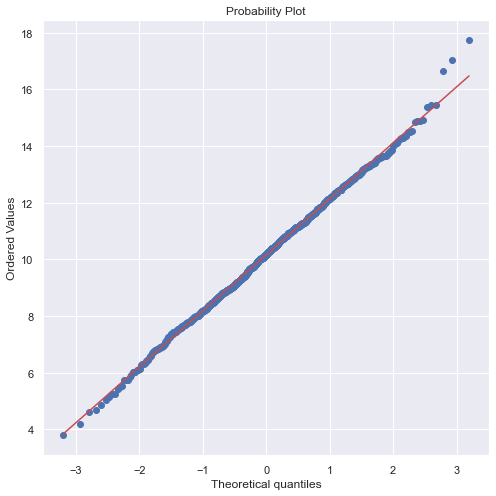

In [16]:
"""
qq-plot показывает отличие нашего распределения от распределения, которое было бы 
идеально нормальным.
Точки под прямой означают, что при нормальном распределении, значения должны превышать
наши.
"""

ss.probplot(data, dist="norm", plot=pylab)
pylab.show()

In [17]:
# !!! реализовать эти два теста самому
"""
Тест Шапиро Уилка проверяет данные на нормальность, мы тестируем гипотезу о том, что
наше распределение значимо не отличается от нормального.
"""
print(ss.shapiro(data))
"""
В случае если выбросы слишком велики, для сравнения двух групп 
изпольуется ранговый тест Манна Уитни, вместо Т-теста, он ранжирует наши значения и после этого
считает какой средний ранг оказался в первой группе, а какой средний ранг во второй.
"""
data1 = np.random.normal(loc = 10, scale = 2, size = 1000)
data2 = np.random.normal(loc = 10, scale = 2, size = 1000)
print(ss.mannwhitneyu(data1, data2)) 

ShapiroResult(statistic=0.9985315799713135, pvalue=0.5753897428512573)
MannwhitneyuResult(statistic=514966.0, pvalue=0.24648351738534846)
